In [1]:
from scipy.stats import bernoulli,geom,poisson,logser
from math import sqrt,log,exp
import matplotlib.pyplot as plt

# Ćwiczenie 0

Boltzmann Sampler ciągów składających się z liter "a" i "b"

In [2]:
a = lambda x:x
b = lambda x:x
d = lambda x:a(x) + b(x)
c = lambda x:1/(1 - d(x))
Ga = lambda _:'a'
Gb = lambda _:'b'

def Gd(x):
    p = a(x)/d(x)
    if bernoulli(p).rvs() == 1:
        return Ga(x)
    return Gb(x)
    
def Gc(x):
    p = d(x)
    if bernoulli(p).rvs() == 1:
        return Gd(x) + Gc(x)
    return ''

# np.mean([len(Gc(145/300)) for _ in range(10000)])


Boltzmann Sampler drzew Catalana

In [3]:
t = lambda x:(1 - sqrt(1 - 4*x))/2
Gt = lambda x:[GSeqt(x)]

def GSeqt(x):
    p = t(x)
    k = geom(1-p).rvs() - 1
    if k != 0:
        return [Gt(x) * k]
    return []

Gt((1/4) - (1/10000))

[[]]

(array([72032., 18140.,  6008.,  2207.,   902.,   388.,   190.,   105.]),
 array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 8 artists>)

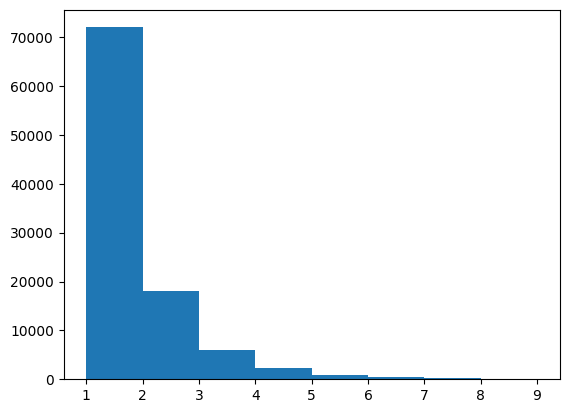

In [10]:
l = logser(0.5)
x = [l.rvs() for _ in range(100000)]
plt.hist(x, bins=range(1,10))

(array([9.986e+03, 9.001e+03, 8.107e+03, 7.217e+03, 6.613e+03, 5.948e+03,
        5.309e+03, 4.765e+03, 4.376e+03, 3.804e+03, 3.492e+03, 3.106e+03,
        2.781e+03, 2.516e+03, 2.381e+03, 1.984e+03, 1.867e+03, 1.639e+03,
        1.537e+03, 1.325e+03, 1.238e+03, 1.145e+03, 1.000e+03, 8.760e+02,
        7.760e+02, 7.040e+02, 6.300e+02, 5.980e+02, 5.480e+02, 4.620e+02,
        4.340e+02, 3.880e+02, 3.370e+02, 3.040e+02, 2.860e+02, 2.480e+02,
        2.280e+02, 2.200e+02, 1.880e+02, 1.470e+02, 1.590e+02, 1.510e+02,
        1.260e+02, 1.090e+02, 1.010e+02, 7.700e+01, 7.000e+01, 7.800e+01,
        6.200e+01, 5.500e+01, 4.900e+01, 5.900e+01, 3.900e+01, 3.300e+01,
        3.100e+01, 3.200e+01, 2.300e+01, 2.700e+01, 1.400e+01, 2.100e+01,
        1.000e+01, 2.100e+01, 8.000e+00, 1.600e+01, 1.600e+01, 1.000e+01,
        9.000e+00, 9.000e+00, 8.000e+00, 6.000e+00, 6.000e+00, 7.000e+00,
        8.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+0

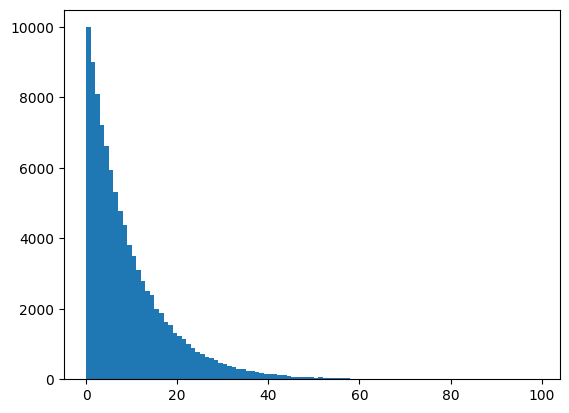

In [8]:
def sample(p):
    sequence_length = 0
    while bernoulli.rvs(p) == 1:
        sequence_length += 1
    return sequence_length

x = [sample(0.9) for _ in range(100000)]
plt.hist(x, bins=range(100))